# Feature Exploration Toolkit

This is a demo notebook for FET - toolkit which tries to speedup repetitive exploration data analysis techniques and clean your notebooks little bit.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/srv/data/uhricdan/data/demo/home.csv')

## Preprocessing functions

In [3]:
from fet.common import convert_times

print(convert_times.__doc__)

Convert time strings and calculate duration.

    Args:
        df (pandas.DataFrame): DataFrame with time_first and time_last.
        inplace (bool, optional): Extract features within provided DataFrame
            or return new DataFrame. Defaults to False.

    Returns:
        pandas.DataFrame: DataFrame is returned only if inplace=False,
            otherwise returns None.
    


In [4]:
convert_times(df, inplace=True)

In [5]:
from fet.pstats import aggregate

print(aggregate.__doc__)

Time aggregation of basic + pstats fields.

    Args:
        df (pandas.DataFrame): DataFrame with basic + pstats fields.
        window (str, optional): Aggregation time window. Defaults to "5min".
    


In [6]:
agg = aggregate(df)
df[agg.columns] = agg

In [7]:
df = df[df['duration'] > 20.]

In [8]:
from fet.pstats import swap_directions

print(swap_directions.__doc__)

Swap directional columns.

    Args:
        df (pandas.DataFrame): DataFrame with directional columns.
        swap (pandas.Series): Bool series of affected rows.
        inplace (bool, optional): Extract features within provided DataFrame
            or return new DataFrame. Defaults to False.

    Returns:
        pandas.DataFrame: DataFrame is returned only if inplace=False,
            otherwise returns None.
    


In [9]:
swap_directions(df, df['dst_ip'].str.startswith('192.168.'), inplace=True)

## Explorer

In [10]:
from fet.explorer import Explorer

print(Explorer.__doc__)

Dataset explorer.

    Args:
        y (str, optional): Target/dependent variable. Defaults to None.
    


In [11]:
e = Explorer(y='label')

In [12]:
print(e.fit.__doc__)

Fit DataFrame to Explorer.

        Args:
            df (pandas.DataFrame): DataFrame to explore.
            remove_low_variance (bool, optional): Remove low variance features. Defaults to True.
            module (string, optional): Features extraction module. Defaults to 'pstats'.
        


In [13]:
e.fit(df)

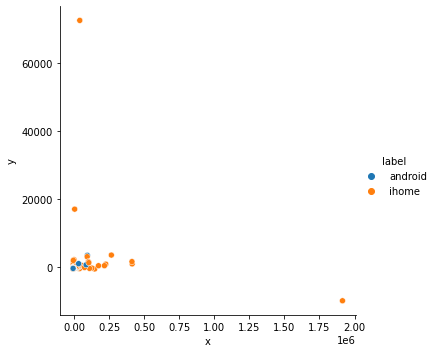

In [14]:
e.plot_pca()

In [15]:
from fet.pstats import extract_features

print(extract_features.__doc__)

Extracts per flow statistics.

    Args:
        df (pandas.DataFrame): Dataframe with basic and pstats values.
        inplace (bool, optional): Extract features within provided DataFrame
            or return new DataFrame. Defaults to False.

    Returns:
        pandas.DataFrame: DataFrame is returned only if inplace=False - otherwise
            returns None.
    


In [16]:
from fet.pstats import feature_cols

print(feature_cols)

['bytes_rate', 'bytes_rev_rate', 'bytes_total_rate', 'packets_rate', 'packets_rev_rate', 'packets_total_rate', 'fin_count', 'syn_count', 'rst_count', 'psh_count', 'ack_count', 'urg_count', 'fin_ratio', 'syn_ratio', 'rst_ratio', 'psh_ratio', 'ack_ratio', 'urg_ratio', 'lengths_min', 'lengths_max', 'lengths_mean', 'lengths_std', 'fwd_lengths_min', 'fwd_lengths_max', 'fwd_lengths_mean', 'fwd_lengths_std', 'bwd_lengths_min', 'bwd_lengths_max', 'bwd_lengths_mean', 'bwd_lengths_std', 'pkt_iat_min', 'pkt_iat_max', 'pkt_iat_mean', 'pkt_iat_std', 'fwd_pkt_iat_min', 'fwd_pkt_iat_max', 'fwd_pkt_iat_mean', 'fwd_pkt_iat_std', 'bwd_pkt_iat_min', 'bwd_pkt_iat_max', 'bwd_pkt_iat_mean', 'bwd_pkt_iat_std', 'norm_pkt_iat_mean', 'norm_pkt_iat_std', 'norm_fwd_pkt_iat_mean', 'norm_fwd_pkt_iat_std', 'norm_bwd_pkt_iat_mean', 'norm_bwd_pkt_iat_std']


In [17]:
e.df

,dst_ip,src_ip,bytes,bytes_rev,link_bit_field,time_first,time_last,dst_mac,src_mac,packets,...,bwd_pkt_iat_min,bwd_pkt_iat_max,bwd_pkt_iat_mean,bwd_pkt_iat_std,norm_pkt_iat_mean,norm_pkt_iat_std,norm_fwd_pkt_iat_mean,norm_fwd_pkt_iat_std,norm_bwd_pkt_iat_mean,norm_bwd_pkt_iat_std
0,255.255.255.255,0.0.0.0,3700.0,0.0,1,2016-09-23 02:27:54.634735,2016-09-23 02:28:46.061507,ff:ff:ff:ff:ff:ff,b4:ce:f6:a7:a3:c2,11.0,...,0.000000,0.000000,0.000000,0.000000,0.100000,0.300000,0.100000,0.300000,0.000000,0.000000
12,209.107.220.167,192.168.1.208,4308.0,288.0,1,2016-09-23 02:28:50.919010,2016-09-23 02:29:39.587075,14:cc:20:51:33:ea,74:2f:68:81:69:42,30.0,...,48.457147,48.457147,48.457147,0.000000,0.064516,0.245670,0.068966,0.253395,1.000000,0.000000
15,213.248.117.217,192.168.1.208,4308.0,288.0,1,2016-09-23 02:28:50.918896,2016-09-23 02:29:23.415141,14:cc:20:51:33:ea,74:2f:68:81:69:42,30.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,224.0.0.251,192.168.1.208,5467.0,0.0,1,2016-09-23 02:28:46.720692,2016-09-23 02:29:50.554750,01:00:5e:00:00:fb,74:2f:68:81:69:42,17.0,...,0.000000,0.000000,0.000000,0.000000,0.187500,0.390312,0.187500,0.390312,0.000000,0.000000
27,239.255.255.250,192.168.1.208,6126.0,0.0,1,2016-09-23 02:28:46.175568,2016-09-23 02:29:32.970697,01:00:5e:7f:ff:fa,74:2f:68:81:69:42,6.0,...,0.000000,0.000000,0.000000,0.000000,0.400000,0.489898,0.400000,0.489898,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,216.58.199.46,192.168.1.243,3349.0,1569.0,1,2016-10-04 06:20:23.360257,2016-10-04 06:23:25.431831,14:cc:20:51:33:ea,ac:bc:32:d4:6f:2f,15.0,...,0.000077,66.792117,13.002044,24.902418,0.103448,0.304543,0.214286,0.410326,0.214286,0.410326
8748,255.255.255.255,192.168.1.243,2040.0,0.0,1,2016-10-04 06:21:39.017970,2016-10-04 06:24:09.444672,ff:ff:ff:ff:ff:ff,ac:bc:32:d4:6f:2f,6.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
8749,52.16.36.153,192.168.1.243,7812.0,5576.0,1,2016-10-04 06:20:17.291276,2016-10-04 06:24:17.203163,14:cc:20:51:33:ea,ac:bc:32:d4:6f:2f,27.0,...,0.000061,20.001821,13.999735,8.664132,0.310345,0.462635,0.500000,0.500000,0.700000,0.458258
8762,64.233.187.189,192.168.1.243,2027.0,2330.0,1,2016-10-04 06:23:14.031705,2016-10-04 06:25:24.690977,14:cc:20:51:33:ea,ac:bc:32:d4:6f:2f,17.0,...,0.016166,25.764317,3.995628,8.778483,0.068966,0.253395,0.142857,0.349927,0.142857,0.349927


In [18]:
e.feature_cols

['bytes_rate',
 'bytes_rev_rate',
 'bytes_total_rate',
 'packets_rate',
 'packets_rev_rate',
 'packets_total_rate',
 'fin_count',
 'syn_count',
 'rst_count',
 'psh_count',
 'ack_count',
 'fin_ratio',
 'syn_ratio',
 'rst_ratio',
 'psh_ratio',
 'ack_ratio',
 'lengths_min',
 'lengths_max',
 'lengths_mean',
 'lengths_std',
 'fwd_lengths_min',
 'fwd_lengths_max',
 'fwd_lengths_mean',
 'fwd_lengths_std',
 'bwd_lengths_min',
 'bwd_lengths_max',
 'bwd_lengths_mean',
 'bwd_lengths_std',
 'pkt_iat_min',
 'pkt_iat_max',
 'pkt_iat_mean',
 'pkt_iat_std',
 'fwd_pkt_iat_min',
 'fwd_pkt_iat_max',
 'fwd_pkt_iat_mean',
 'fwd_pkt_iat_std',
 'bwd_pkt_iat_min',
 'bwd_pkt_iat_max',
 'bwd_pkt_iat_mean',
 'bwd_pkt_iat_std',
 'norm_pkt_iat_mean',
 'norm_pkt_iat_std',
 'norm_fwd_pkt_iat_mean',
 'norm_fwd_pkt_iat_std',
 'norm_bwd_pkt_iat_mean',
 'norm_bwd_pkt_iat_std']

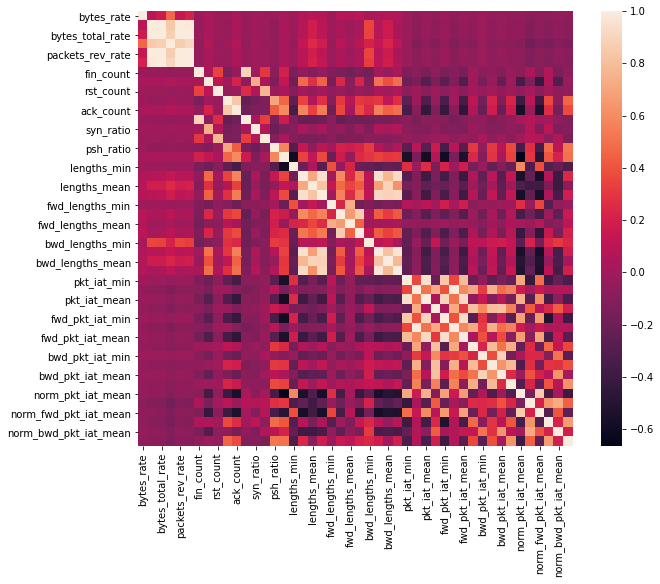

In [19]:
e.correlation_matrix()

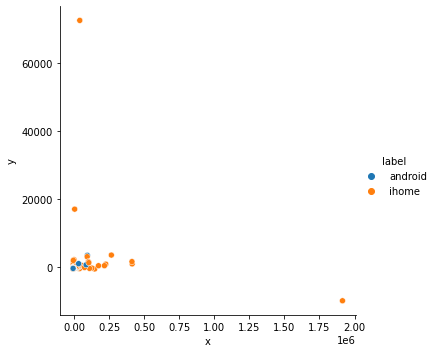

In [20]:
e.plot_pca()

In [21]:
e.correlated_features()

bytes_rev_rate    0.996155
Name: bytes_total_rate, dtype: float64

bytes_rev_rate      0.998237
bytes_total_rate    0.999454
Name: packets_rev_rate, dtype: float64

bytes_rev_rate      0.988283
bytes_total_rate    0.995803
packets_rev_rate    0.994611
Name: packets_total_rate, dtype: float64

bwd_lengths_max    0.97001
Name: bwd_lengths_std, dtype: float64

pkt_iat_min    0.952162
Name: pkt_iat_mean, dtype: float64

pkt_iat_max    0.997035
Name: fwd_pkt_iat_max, dtype: float64



In [22]:
e.remove_features(
    [
        'packets_total_rate',
        'pkt_iat_min',
        'packets_total_rate',
        'bytes_total_rate',
        'bwd_lengths_max'
    ]
)

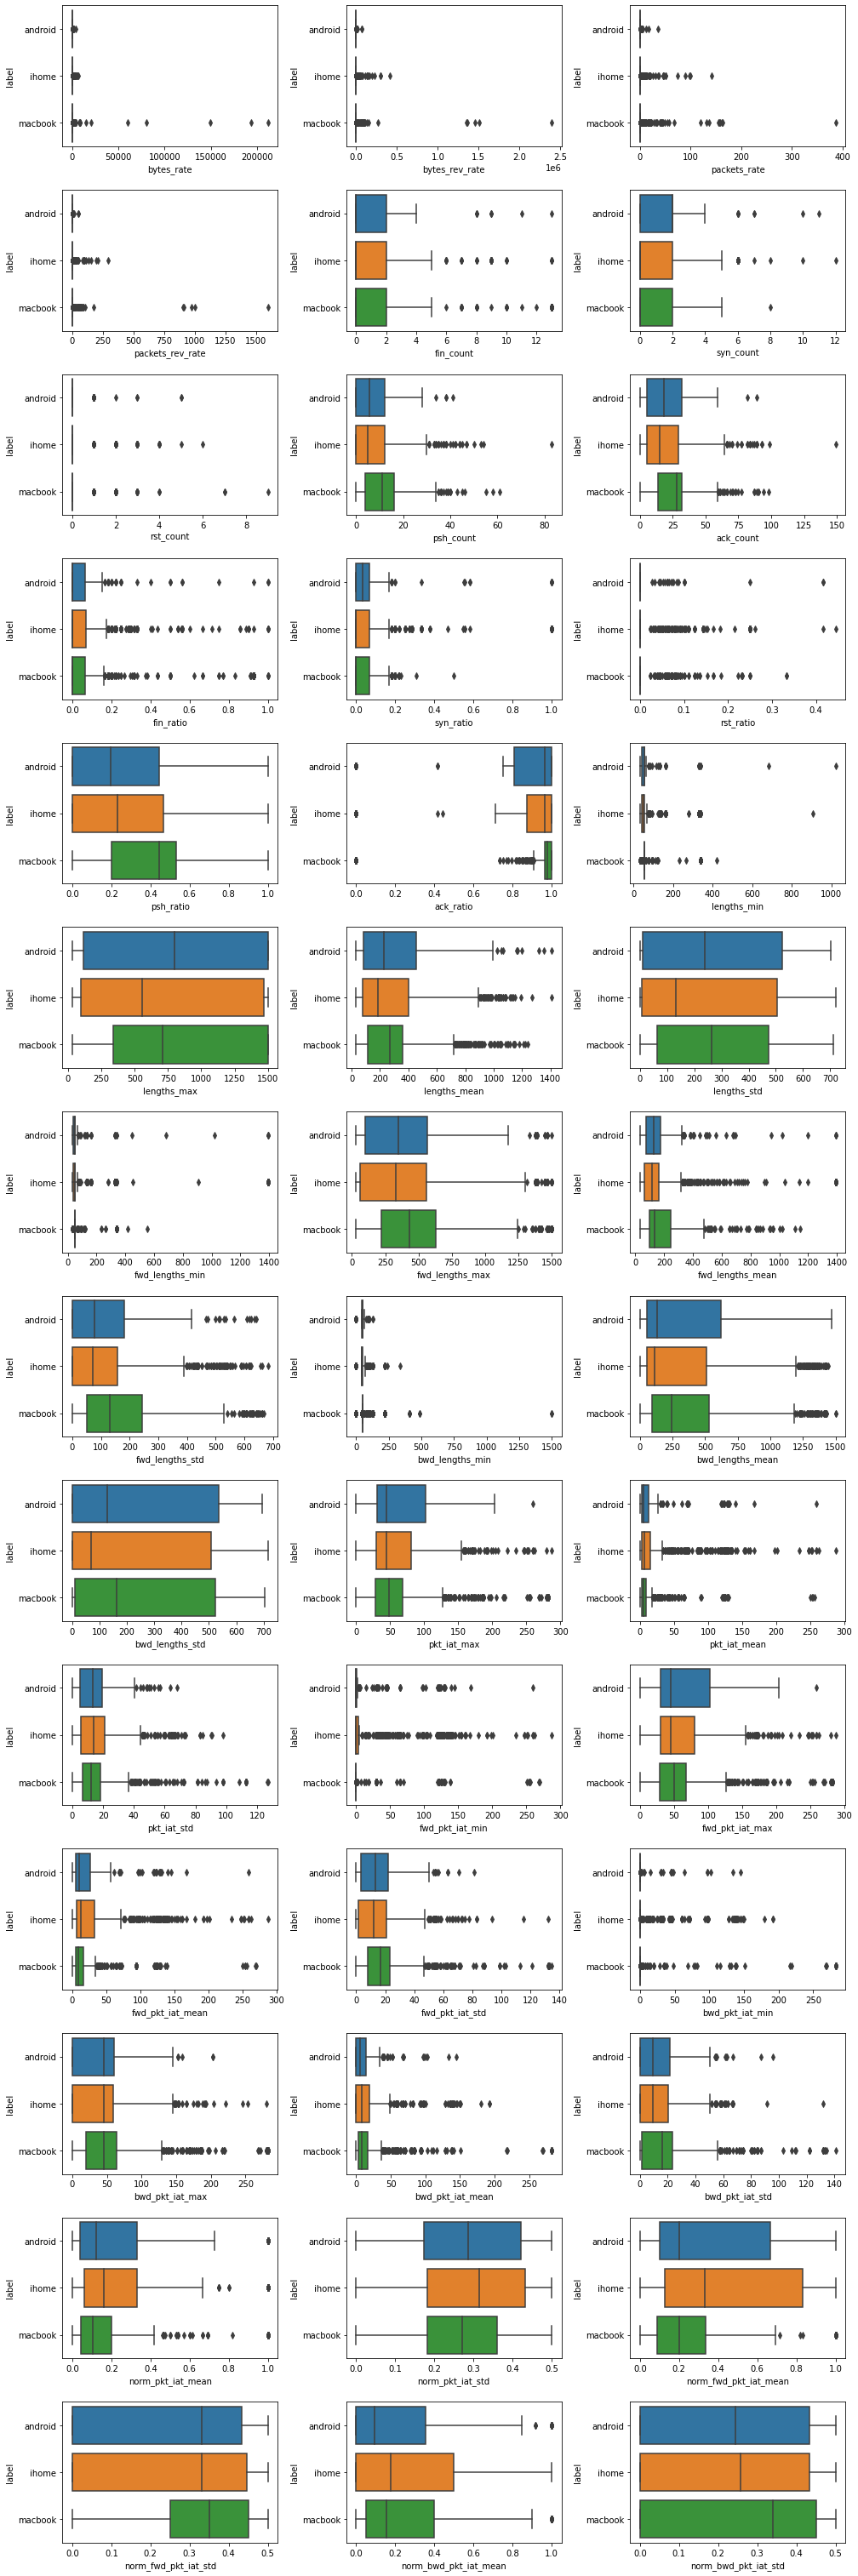

In [23]:
e.boxplot()

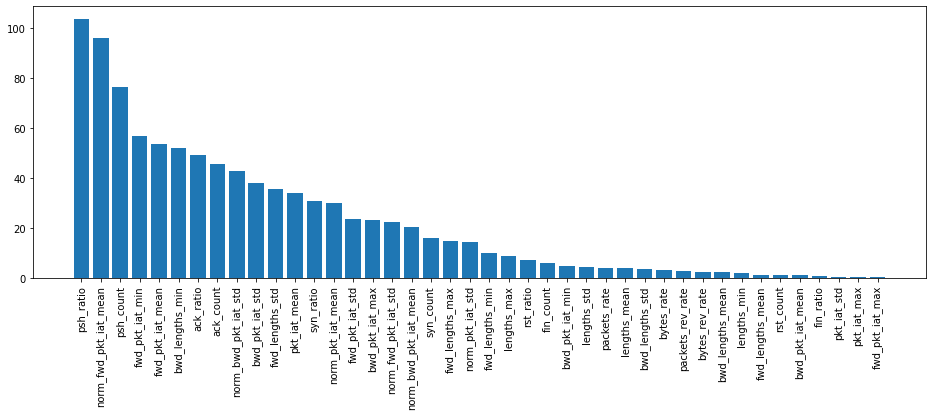

In [24]:
e.plot_feature_scores()

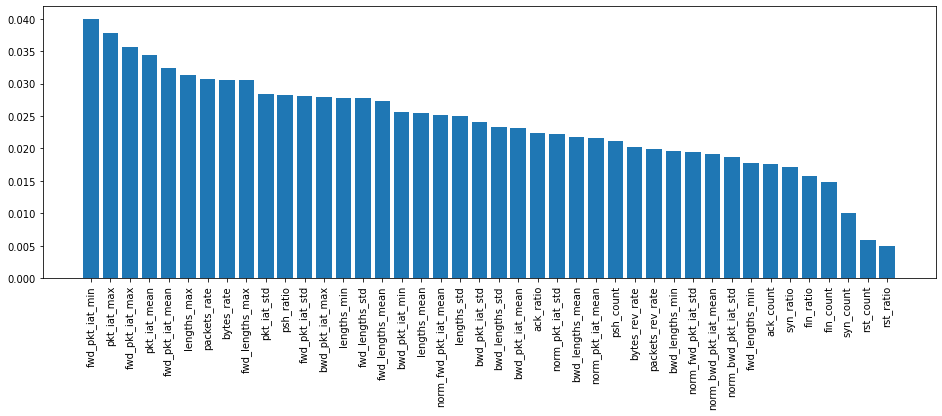

In [25]:
e.plot_feature_importances()

In [26]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()

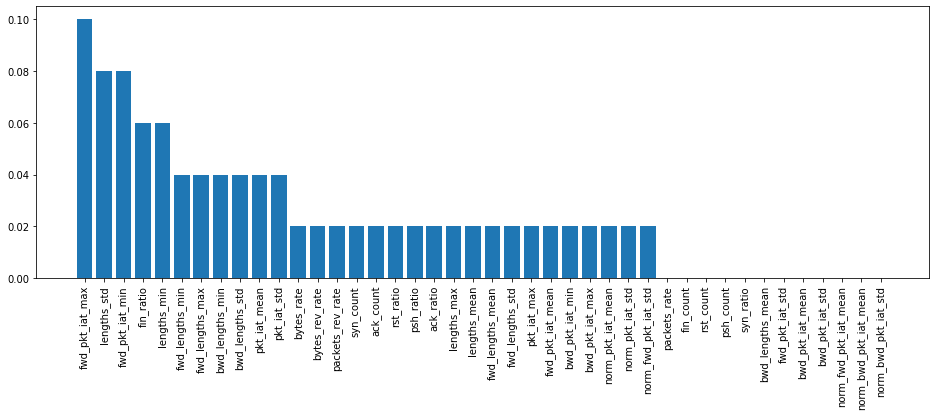

In [27]:
e.plot_feature_importances(ab)

In [28]:
e.feature_importances(ab)

[('lengths_std', 0.08),
 ('fwd_pkt_iat_min', 0.08),
 ('fwd_pkt_iat_max', 0.08),
 ('fin_ratio', 0.06),
 ('lengths_min', 0.06),
 ('fwd_lengths_min', 0.04),
 ('fwd_lengths_max', 0.04),
 ('bwd_lengths_min', 0.04),
 ('bwd_lengths_std', 0.04),
 ('pkt_iat_max', 0.04),
 ('pkt_iat_mean', 0.04),
 ('pkt_iat_std', 0.04),
 ('bytes_rate', 0.02),
 ('bytes_rev_rate', 0.02),
 ('packets_rev_rate', 0.02),
 ('syn_count', 0.02),
 ('ack_count', 0.02),
 ('rst_ratio', 0.02),
 ('psh_ratio', 0.02),
 ('ack_ratio', 0.02),
 ('lengths_max', 0.02),
 ('lengths_mean', 0.02),
 ('fwd_lengths_mean', 0.02),
 ('fwd_lengths_std', 0.02),
 ('fwd_pkt_iat_mean', 0.02),
 ('bwd_pkt_iat_min', 0.02),
 ('bwd_pkt_iat_max', 0.02),
 ('norm_pkt_iat_mean', 0.02),
 ('norm_pkt_iat_std', 0.02),
 ('norm_fwd_pkt_iat_std', 0.02),
 ('packets_rate', 0.0),
 ('fin_count', 0.0),
 ('rst_count', 0.0),
 ('psh_count', 0.0),
 ('syn_ratio', 0.0),
 ('bwd_lengths_mean', 0.0),
 ('fwd_pkt_iat_std', 0.0),
 ('bwd_pkt_iat_mean', 0.0),
 ('bwd_pkt_iat_std', 0.0),

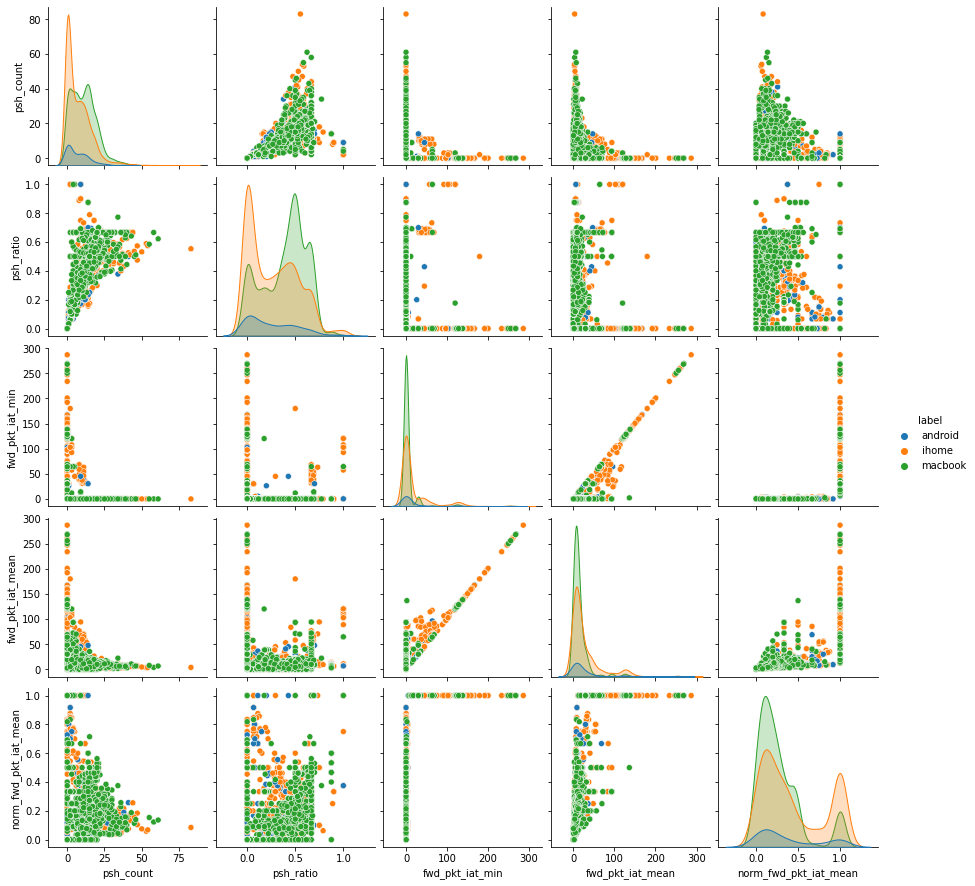

In [29]:
e.pairplot(e.kbest(5))

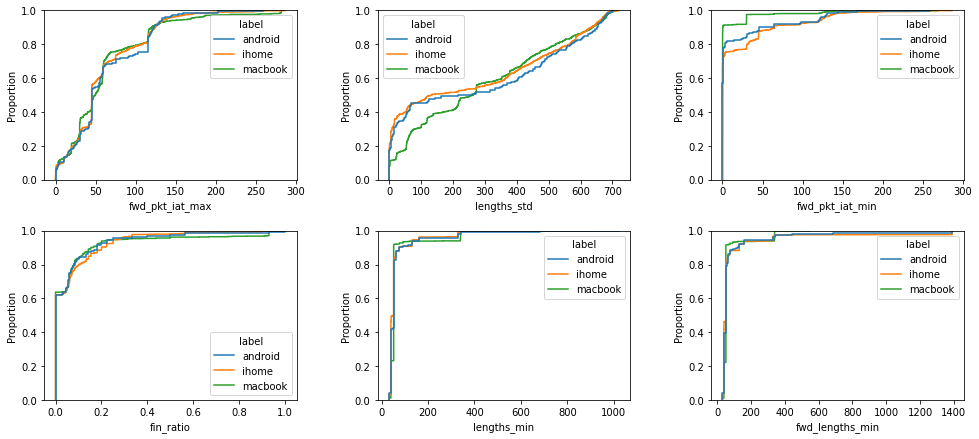

In [30]:
e.ecdfplot([x[0] for x in e.feature_importances(ab)[:6]])